# 用户指南，第14章：节拍
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_13_music21object2.html)

到目前为止，我们几乎一直在处理 4/4 拍的音乐。这并不是因为我们非常喜欢，而仅仅是因为，正如我们在第 4 章中提到的，没有指定拍号的 music21 `Stream` 对象默认使用 4/4 拍。

通常，节拍`TimeSignature`对象位于`Measure`对象内部。然而，在某些情况下，`TimeSignature`对象可以直接位于`Stream`上。

`TimeSignature`对象作为`Music21Object`的子类，具有时刻`offset`，可以放置在`Stream`上的任何位置。当放置在小节中时，`TimeSignature`通常放置在开始处。可以通过`measure.timeSignature`来设置或获取小节开始处的节拍对象。如果小节没有节拍对象，则`timeSignature`属性返回 None。

与节拍相关的对象和函数包含在`music21.meter`模块中，当你输入`from music21 import *`时会导入该模块。该模块中有很多内容，但我们最关心的是`TimeSignature`对象。我们先创建一些音符和一个`TimeSignature`对象。

In [1]:
from music21 import *

noteC = note.Note('C4', type='half')
noteD = note.Note('D4', type='quarter')
noteE = note.Note('E4', type='quarter')
noteF = note.Note('F4', type='half')

tsThreeFour = meter.TimeSignature('3/4')

print(tsThreeFour.numerator, '/',  tsThreeFour.denominator)

3 / 4


可以用`.ratioString`将节拍直接转换为字符串：

In [2]:
tsThreeFour.ratioString

'3/4'

In [3]:
stream1 = stream.Stream()

for thisThing in [tsThreeFour, noteC, noteD, noteE, noteF]:
    stream1.append(thisThing)

In [4]:
stream1.show('text')

{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C>
{2.0} <music21.note.Note D>
{3.0} <music21.note.Note E>
{4.0} <music21.note.Note F>


In [5]:
tsThreeFour.duration.quarterLength

0.0

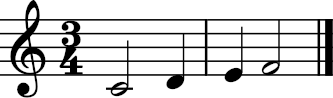

In [6]:
stream1.show()

In [7]:
stream2 = stream1.makeMeasures()
stream2.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note D>
{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.note.Note E>
    {1.0} <music21.note.Note F>
    {3.0} <music21.bar.Barline type=final>


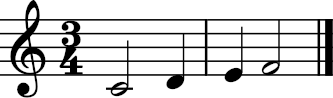

In [8]:
stream2.show()

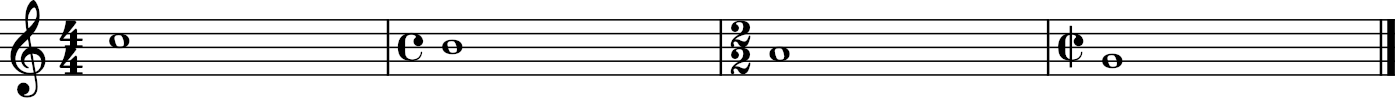

In [9]:
s = stream.Stream()
ts0 = meter.TimeSignature('4/4')
ts1 = meter.TimeSignature('4/4')
ts1.symbol = 'common'
ts2 = meter.TimeSignature('2/2')
ts3 = meter.TimeSignature('2/2')
ts3.symbol = 'cut'
s.append(ts0)
s.append(note.Note('C5', type='whole'))
s.append(ts1)
s.append(note.Note('B4', type='whole'))
s.append(ts2)
s.append(note.Note('A4', type='whole'))
s.append(ts3)
s.append(note.Note('G4', type='whole'))
s.makeMeasures(inPlace=True)
s.show()

In [10]:
stream1.notes[0]

<music21.note.Note C>

In [11]:
stream1.notes[0].beat

1.0

In [12]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 3.0
<music21.note.Note E> 1.0
<music21.note.Note F> 2.0


In [13]:
for n in stream1.notes:
    if n.beat == 1.0:
        print(n)

<music21.note.Note C>
<music21.note.Note E>


In [14]:
tsThreeFour.ratioString

'3/4'

In [15]:
tsThreeFour.ratioString = '2/4'

In [16]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 1.0
<music21.note.Note E> 2.0
<music21.note.Note F> 1.0


In [17]:
tsThreeFour.numerator = 6
tsThreeFour.denominator = 8
tsThreeFour

<music21.meter.TimeSignature 6/8>

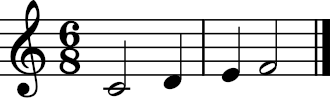

In [18]:
stream1.show()

In [19]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 7/3
<music21.note.Note E> 1.0
<music21.note.Note F> 5/3


In [20]:
for n in stream1.notes:
    print(n, n.beatStr)

<music21.note.Note C> 1
<music21.note.Note D> 2 1/3
<music21.note.Note E> 1
<music21.note.Note F> 1 2/3


In [21]:
tsThreeFour.beatCount

2

In [22]:
tsThreeFour.beatCount = 6

for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 5.0
<music21.note.Note E> 1.0
<music21.note.Note F> 3.0


In [23]:
tsFast68 = meter.TimeSignature('fast 6/8')
tsSlow68 = meter.TimeSignature('slow 6/8')

tsFast68.beatCount, tsSlow68.beatCount

(2, 6)

In [24]:
myBach = corpus.parse('bach/bwv57.8')

print(myBach.__class__)

<class 'music21.stream.base.Score'>


In [25]:
alto = myBach.parts['Alto']

alto

<music21.stream.Part Alto>

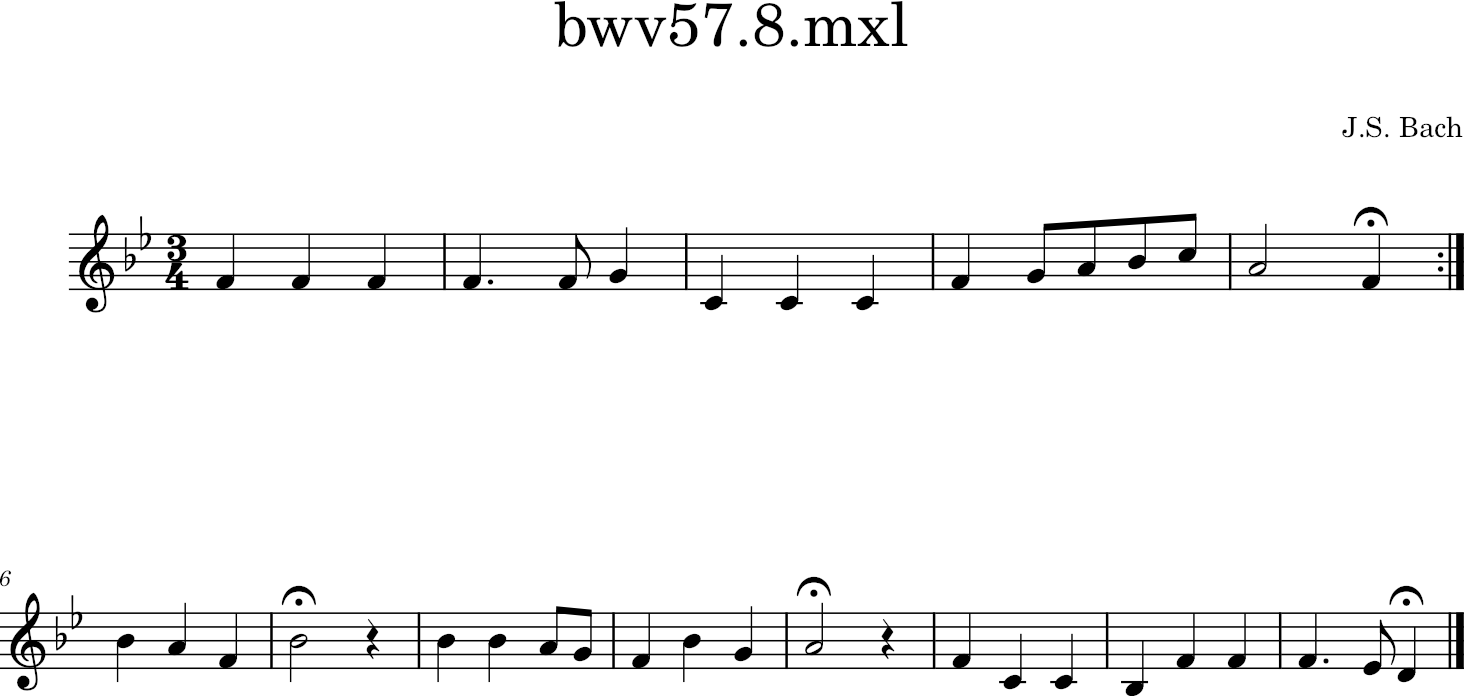

In [26]:
alto.show()

In [27]:
alto.recurse().getElementsByClass(meter.TimeSignature)[0]

<music21.meter.TimeSignature 3/4>

In [28]:
len(alto.recurse().getElementsByClass(meter.TimeSignature))

1

In [29]:
alto.measure(1).timeSignature

<music21.meter.TimeSignature 3/4>

In [30]:
alto.measure(7).timeSignature is None

True

In [31]:
alto.measure(7).timeSignature = meter.TimeSignature('6/8')

In [32]:
alto.makeBeams(inPlace=True)

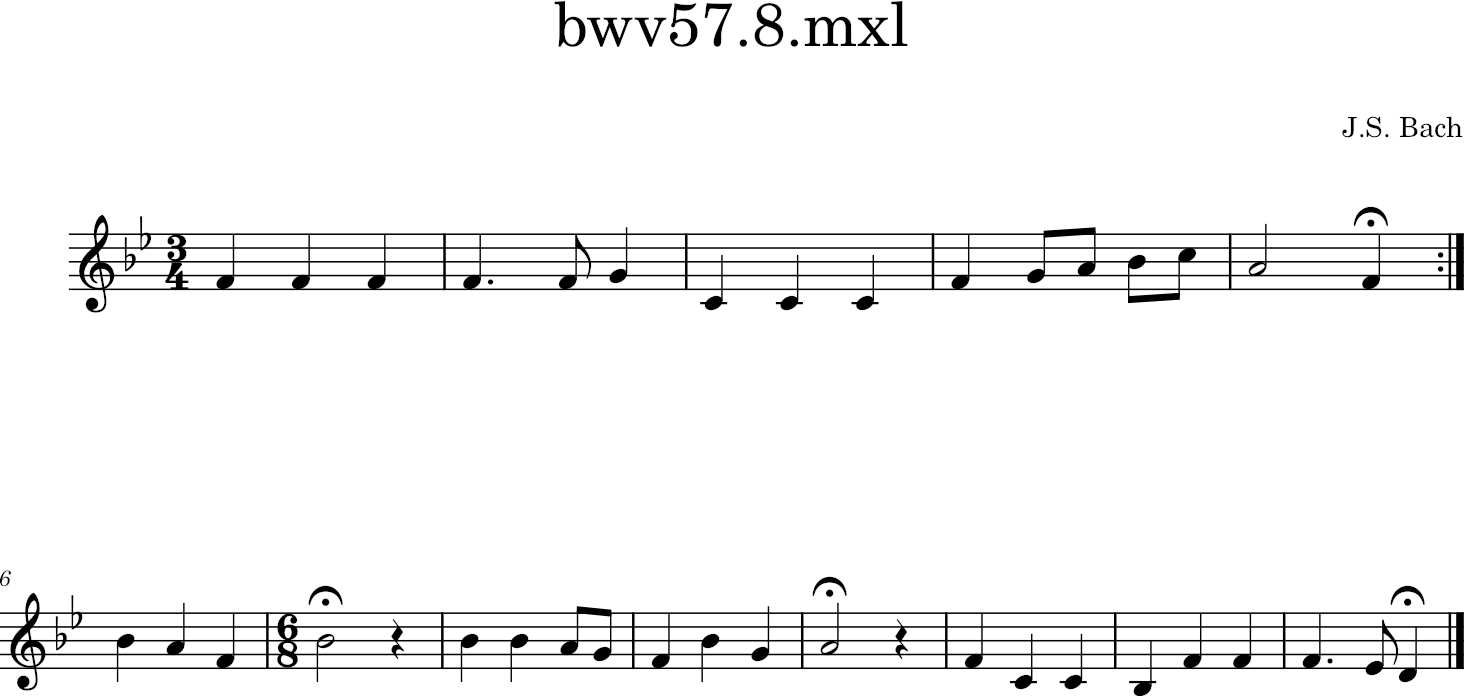

In [33]:
for n in alto.recurse().notes:
    n.stemDirection = 'unspecified'

alto.show()

In [34]:
newAlto = alto.flatten().getElementsNotOfClass([meter.TimeSignature,
                                                layout.LayoutBase]
                                              ).stream()
newAlto.insert(0, meter.TimeSignature('2/4'))

In [35]:
newAlto.makeMeasures(inPlace=True)
newAlto.measures(1, 4).show('text', addEndTimes=True)

{0.0 - 2.0} <music21.stream.Measure 1 offset=0.0>
    {0.0 - 0.0} <music21.instrument.Instrument 'P2: Alto: '>
    {0.0 - 0.0} <music21.clef.TrebleClef>
    {0.0 - 0.0} <music21.key.Key of B- major>
    {0.0 - 0.0} <music21.meter.TimeSignature 2/4>
    {0.0 - 1.0} <music21.note.Note F>
    {1.0 - 2.0} <music21.note.Note F>
{2.0 - 4.5} <music21.stream.Measure 2 offset=2.0>
    {0.0 - 1.0} <music21.note.Note F>
    {1.0 - 2.5} <music21.note.Note F>
{4.0 - 6.0} <music21.stream.Measure 3 offset=4.0>
    {0.5 - 1.0} <music21.note.Note F>
    {1.0 - 2.0} <music21.note.Note G>
{6.0 - 8.0} <music21.stream.Measure 4 offset=6.0>
    {0.0 - 1.0} <music21.note.Note C>
    {1.0 - 2.0} <music21.note.Note C>


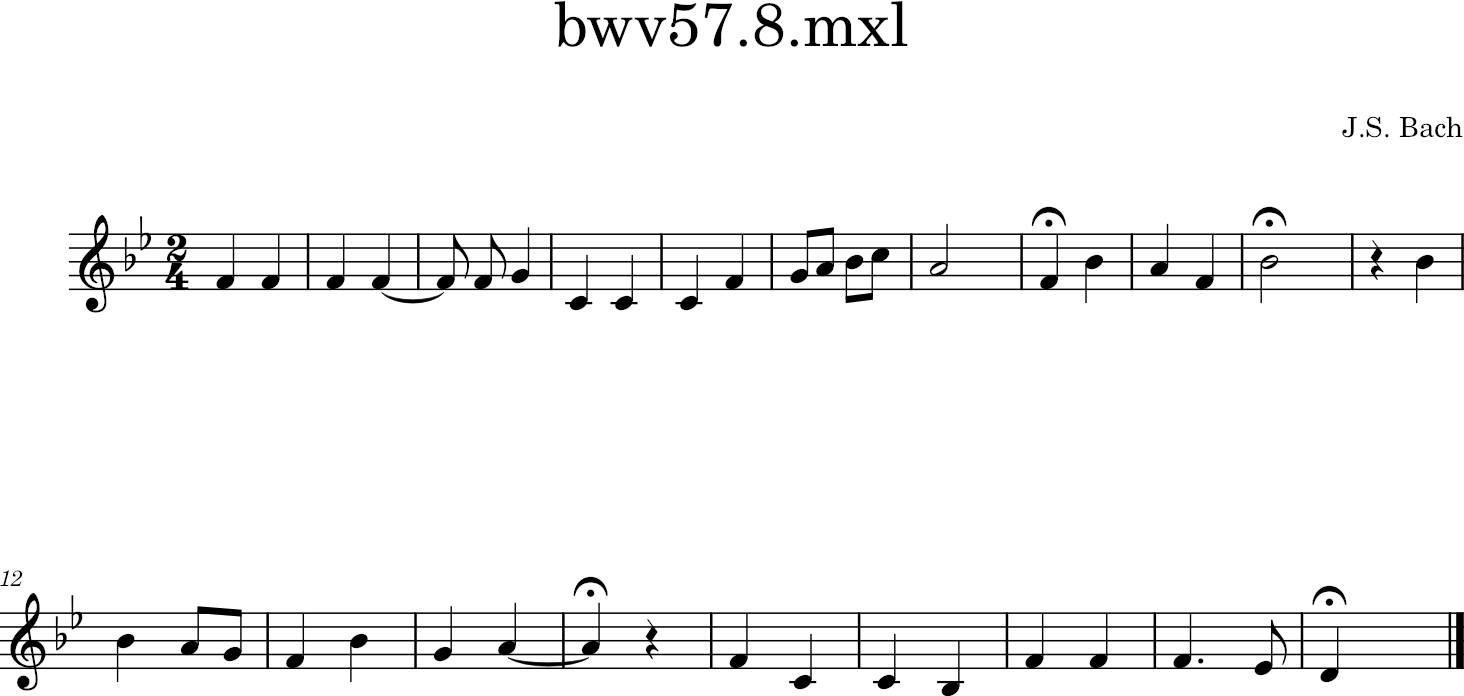

In [36]:
newAltoFixed = newAlto.makeNotation()
newAltoFixed.show()

In [37]:
newFlatAlto = newAlto.flatten()
ts = newFlatAlto.getTimeSignatures()[0]
ts

<music21.meter.TimeSignature 2/4>

In [38]:
newFlatAlto.replace(ts, meter.TimeSignature('5/8'))
newFlatAlto.getTimeSignatures()[0]

<music21.meter.TimeSignature 5/8>

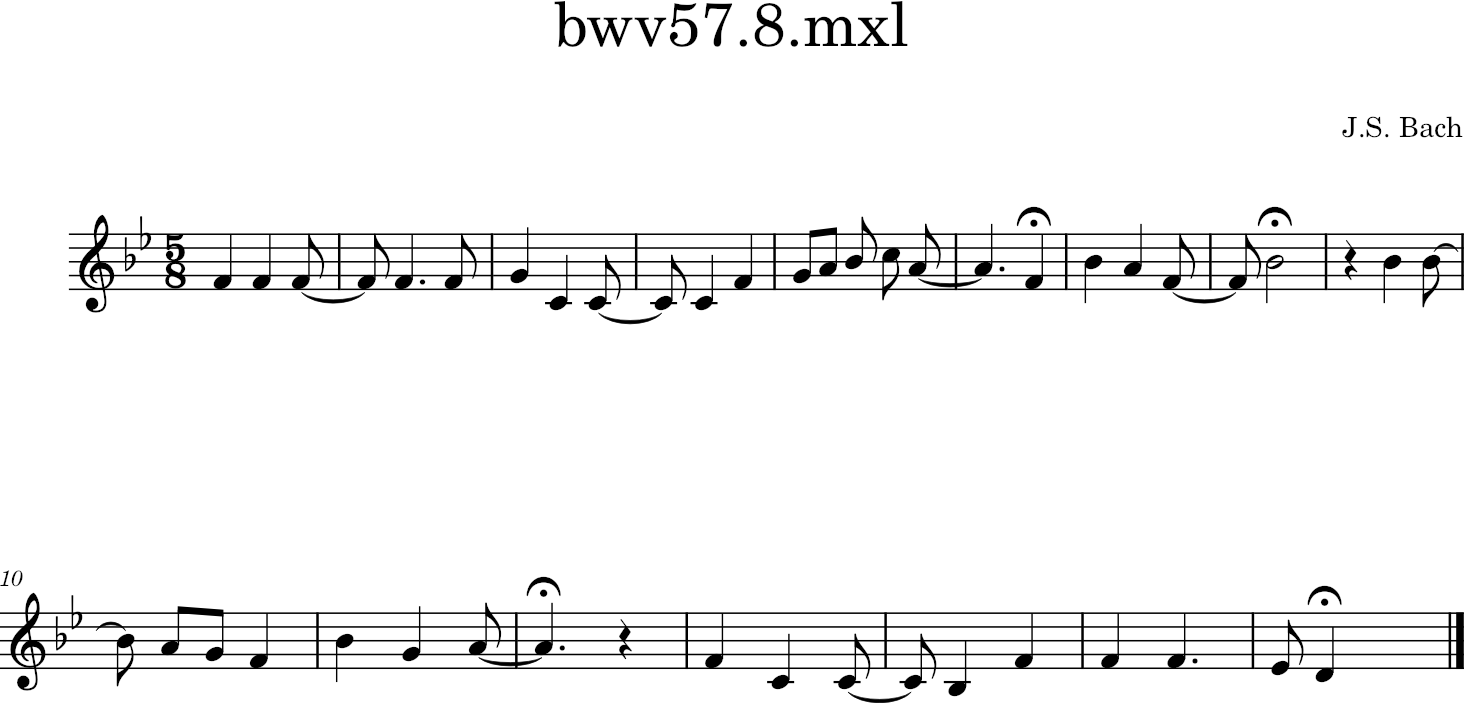

In [39]:
newFlatAlto.makeNotation().show()

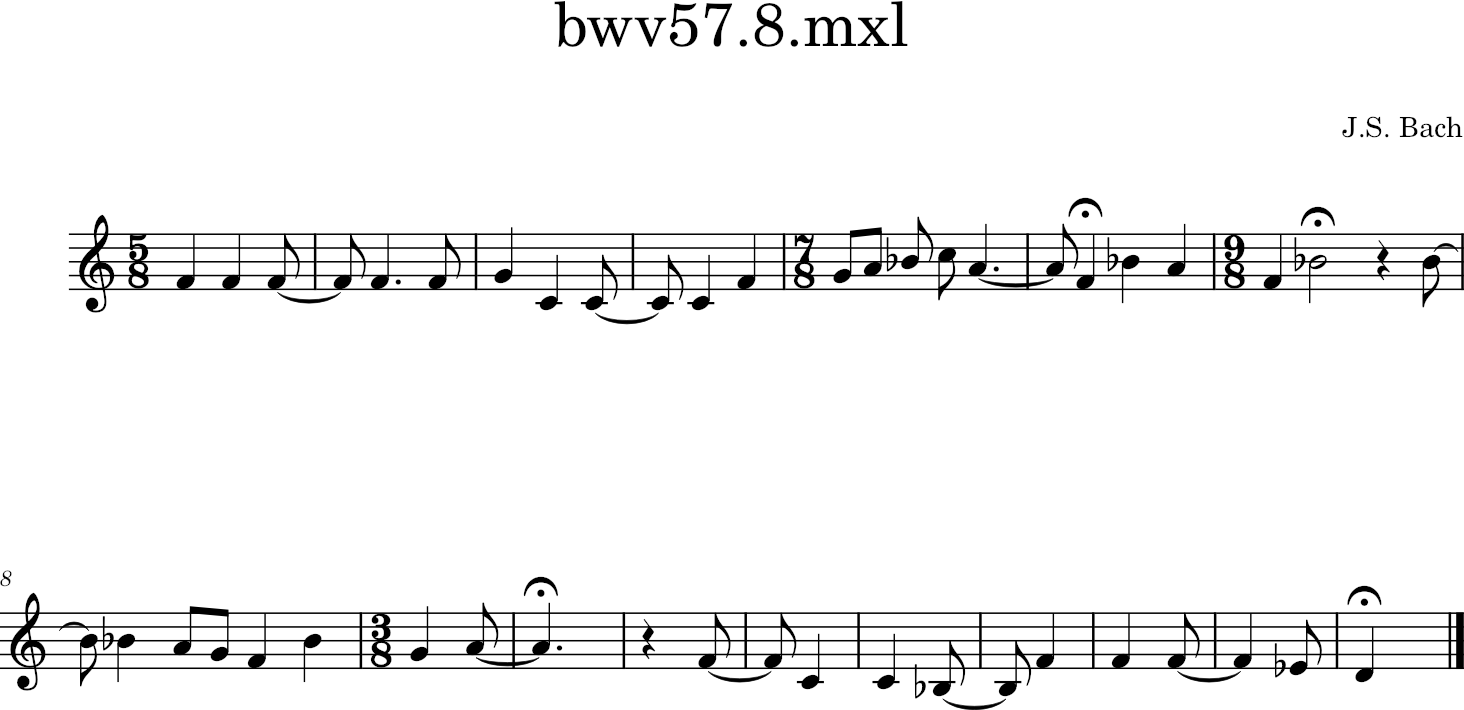

In [40]:
newAlto = alto.flatten().notesAndRests.stream()
newAlto.insert(0.0, meter.TimeSignature('5/8'))
newAlto.insert(10.0, meter.TimeSignature('7/8'))
newAlto.insert(17.0, meter.TimeSignature('9/8'))
newAlto.insert(26.0, meter.TimeSignature('3/8'))
newAlto.makeNotation().show()

In [41]:
tsList = newAlto.getTimeSignatures()

In [42]:
print(tsList.__class__)
tsList.show('text')

<class 'music21.stream.base.Part'>
{0.0} <music21.meter.TimeSignature 5/8>
{10.0} <music21.meter.TimeSignature 7/8>
{17.0} <music21.meter.TimeSignature 9/8>
{26.0} <music21.meter.TimeSignature 3/8>


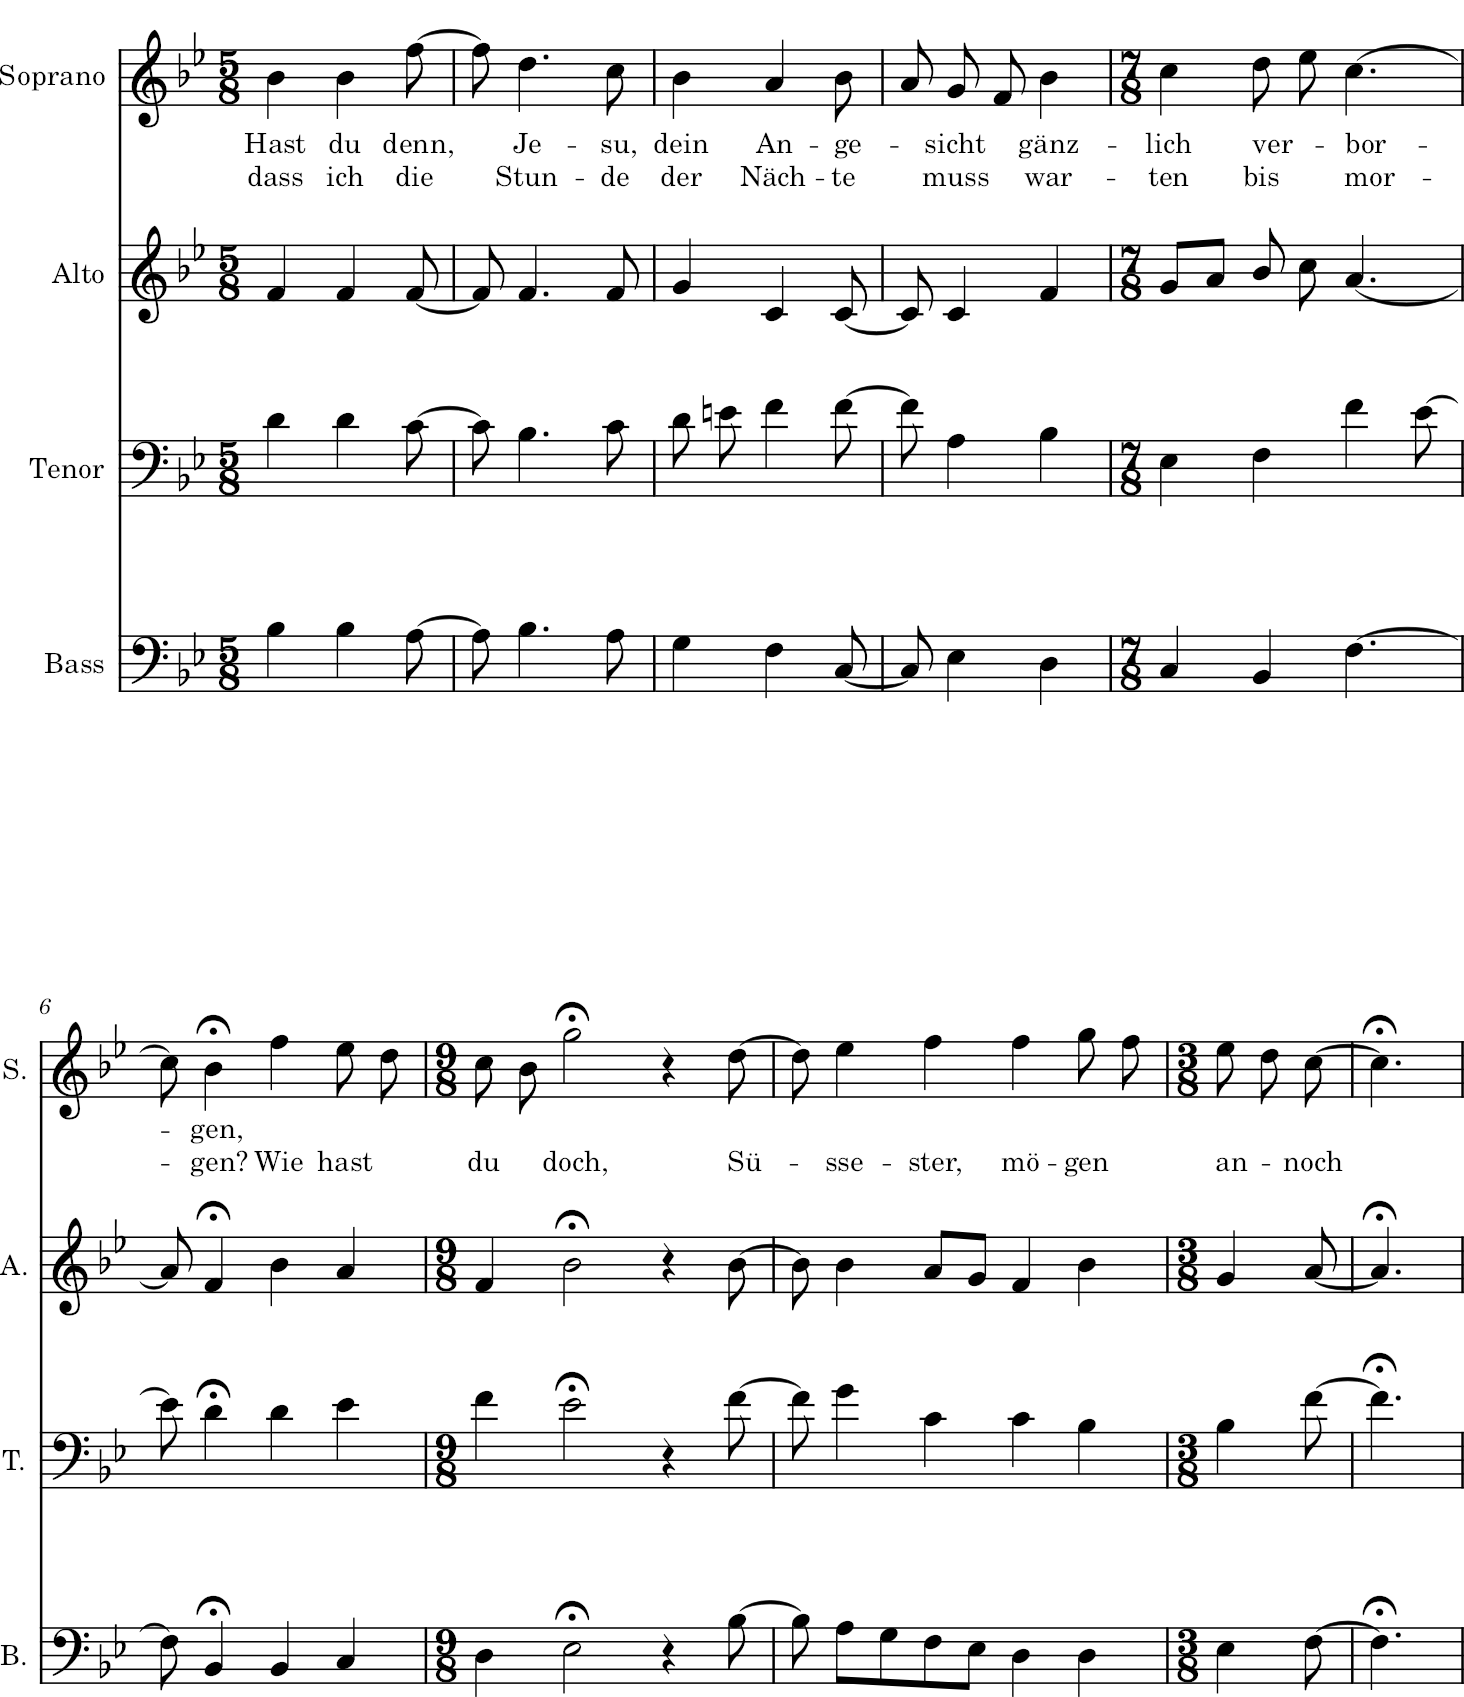

In [43]:
newScore = stream.Score()

for part in myBach.parts:
    flatPart = part.flatten()
    noTSPart = flatPart.getElementsNotOfClass('TimeSignature').stream()
    for ts in tsList:
        noTSPart.insert(ts.offset, ts)
    noTSPart.makeNotation(inPlace=True)
    newScore.insert(0, noTSPart)

newScore.measures(1, 10).show()

In [44]:
sopr = myBach.parts['Soprano'].measures(1,2)

for n in sopr.recurse().notes:
    print(n, n.beatStr)

<music21.note.Note B-> 1
<music21.note.Note B-> 2
<music21.note.Note F> 3
<music21.note.Note D> 1
<music21.note.Note C> 2 1/2
<music21.note.Note B-> 3


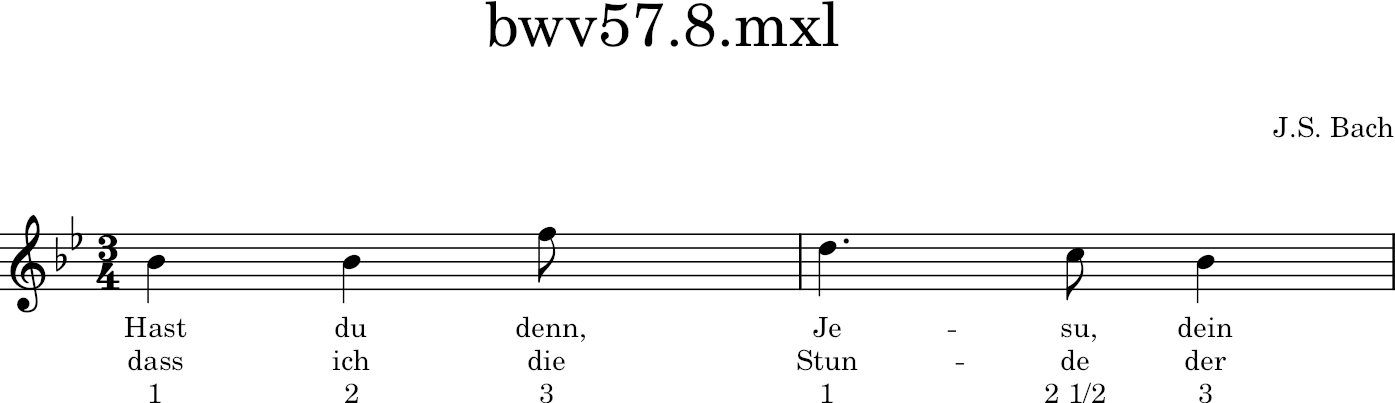

In [45]:
for n in sopr.recurse().notes:
    n.addLyric(n.beatStr)

sopr.show()

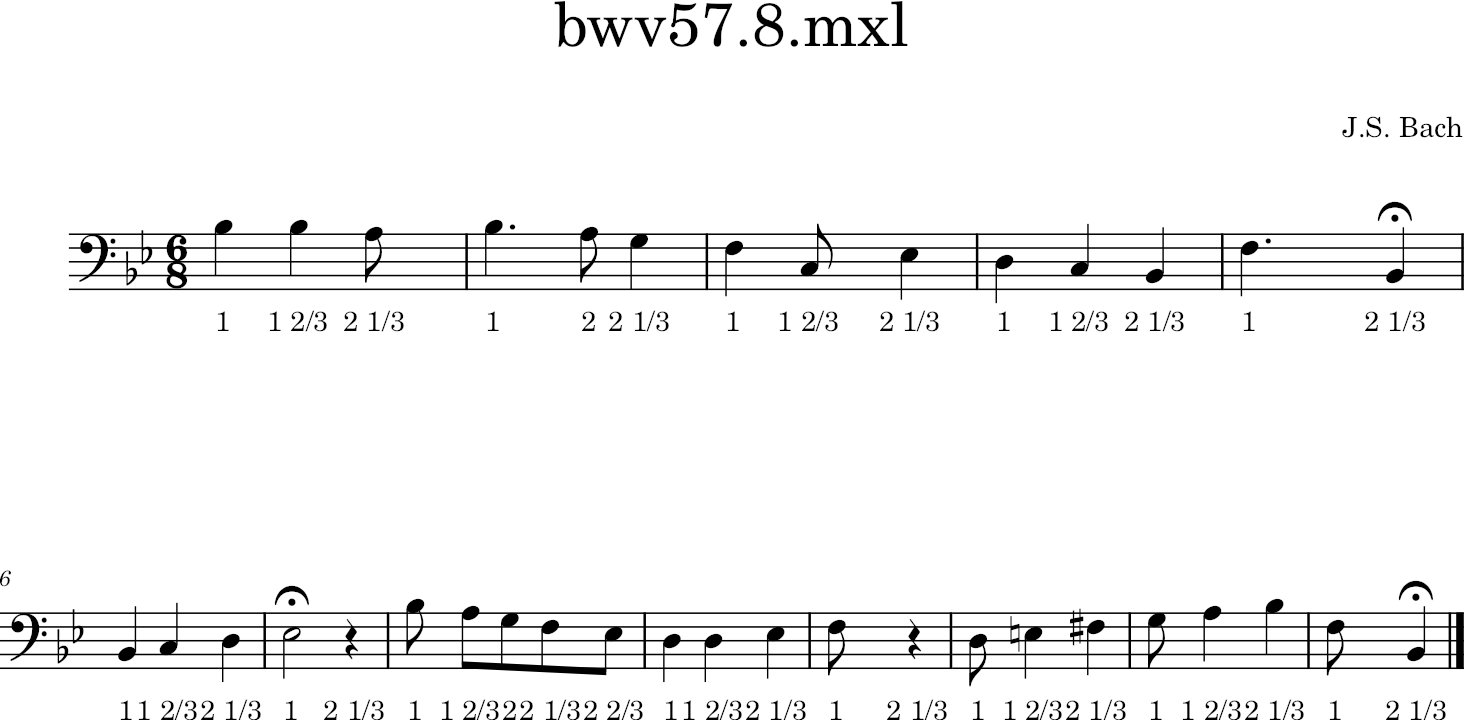

In [46]:
bass = myBach.getElementById('Bass')
newBass = bass.flatten().getElementsNotOfClass(meter.TimeSignature).stream()
newMeasures = newBass.makeMeasures(meter.TimeSignature('6/8'))
newMeasures.makeTies(inPlace=True)
for n in newMeasures.recurse().notesAndRests:
    n.addLyric(n.beatStr)
newMeasures.show()

In [47]:
for n in sopr.recurse().notes:
    print(n, n.beatStrength)

<music21.note.Note B-> 1.0
<music21.note.Note B-> 0.5
<music21.note.Note F> 0.5
<music21.note.Note D> 1.0
<music21.note.Note C> 0.25
<music21.note.Note B-> 0.5
